# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set variables for base url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Setup URL query using the base url, api key, and units
query_url = f"{url}appid={api_key}&units={units}&q="

# Create lists to hold relevant data
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
latitude_list = []
longitude_list = []
maxtemperature_list = []
windspeed_list = []

# City counter for loop
citycounter = 0

# Header of print log
print("Retrieving data.")
print("----------------")

# Loop through list of cities
for eachcity in cities:
    
    # Perform a get request for each city and store json response in a variable
    jsonresponse = requests.get(query_url + eachcity).json()
    
    # Handle errors for cities with missing data
    try:
        
        # Retrieve specific data and append to relevant list
        # City
        city = jsonresponse['name']
        city_list.append(city)
        # Cloudiness
        cloudiness = jsonresponse['clouds']['all']
        cloudiness_list.append(cloudiness)
        # Country
        country = jsonresponse['sys']['country']
        country_list.append(country)
        # Data
        date = jsonresponse["dt"]
        date_list.append(date)
        # Humidity
        humidity = jsonresponse['main']['humidity']
        humidity_list.append(humidity)
        # Latitude
        latitude = jsonresponse['coord']['lat']
        latitude_list.append(latitude)
        # Longitude
        longitude = jsonresponse['coord']['lon']
        longitude_list.append(longitude)
        # Max temperature
        maxtemperature = jsonresponse['main']['temp_max']
        maxtemperature_list.append(maxtemperature)
        # Wind speed
        windspeed = jsonresponse['wind']['speed']
        windspeed_list.append(windspeed)
        
        # Track city count
        citycounter = citycounter + 1
        
        # Print log of each city
        print(f"City number {citycounter} is named {eachcity}.")
    
    except:
        # If the city is missing data, print different log and move to next city
        print('The data is incomplete for this city. Moving to next city...')
        pass

# Footer of print log
print("-----------------------------")
print("City data retrieval complete.")

Retrieving data.
----------------
City number 1 is named nokaneng.
City number 2 is named kavieng.
City number 3 is named ushuaia.
City number 4 is named vardo.
City number 5 is named butaritari.
City number 6 is named gat.
City number 7 is named kaitangata.
City number 8 is named port alfred.
City number 9 is named lata.
City number 10 is named kyra.
The data is incomplete for this city. Moving to next city...
The data is incomplete for this city. Moving to next city...
City number 11 is named rikitea.
City number 12 is named hithadhoo.
City number 13 is named bambous virieux.
City number 14 is named jacareacanga.
City number 15 is named bluff.
City number 16 is named puerto ayora.
City number 17 is named port lincoln.
City number 18 is named ilulissat.
City number 19 is named hirakud.
City number 20 is named sagauli.
City number 21 is named tasiilaq.
City number 22 is named saint-philippe.
City number 23 is named avarua.
City number 24 is named norman wells.
City number 25 is named p

City number 207 is named aquin.
City number 208 is named klaksvik.
City number 209 is named krasnoselkup.
City number 210 is named saryozek.
City number 211 is named fortuna.
City number 212 is named coihaique.
City number 213 is named marienburg.
City number 214 is named bouca.
City number 215 is named constitucion.
City number 216 is named peravurani.
City number 217 is named san patricio.
City number 218 is named avila.
City number 219 is named mangrol.
City number 220 is named filadelfia.
City number 221 is named lashio.
City number 222 is named avare.
City number 223 is named rovaniemi.
The data is incomplete for this city. Moving to next city...
City number 224 is named avera.
City number 225 is named linfen.
City number 226 is named laurel.
City number 227 is named bandiagara.
City number 228 is named yumen.
The data is incomplete for this city. Moving to next city...
City number 229 is named nemuro.
City number 230 is named konya.
City number 231 is named tuktoyaktuk.
City numb

City number 409 is named vestmannaeyjar.
City number 410 is named riberalta.
City number 411 is named cairns.
City number 412 is named leua.
City number 413 is named bonanza.
The data is incomplete for this city. Moving to next city...
City number 414 is named ayan.
City number 415 is named kedrovyy.
City number 416 is named lakhnadon.
The data is incomplete for this city. Moving to next city...
City number 417 is named muroto.
The data is incomplete for this city. Moving to next city...
City number 418 is named boende.
City number 419 is named murray bridge.
City number 420 is named cap-aux-meules.
City number 421 is named salta.
City number 422 is named polunochnoye.
City number 423 is named kandiari.
City number 424 is named vilani.
City number 425 is named alto araguaia.
The data is incomplete for this city. Moving to next city...
City number 426 is named rundu.
The data is incomplete for this city. Moving to next city...
City number 427 is named yeppoon.
City number 428 is named k

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Display data in a data frame
cityweather_df = pd.DataFrame({"City" : city_list, "Cloudiness" : cloudiness_list,
                          "Country" : country_list, "Date" : date_list,
                          "Humidity" : humidity_list, "Latitude" : latitude_list, 
                          "Longitude" : longitude_list, "Max Temperature" : maxtemperature_list, 
                          "Wind Speed" : windspeed_list})

# Convert 'Date' column to display in readable format
cityweather_df['Date'] = pd.to_datetime(cityweather_df['Date'], unit = 's')

cityweather_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Nokaneng,94,BW,2022-02-11 09:14:45,50,-19.6667,22.2667,81.91,6.73
1,Kavieng,87,PG,2022-02-11 09:14:45,77,-2.5744,150.7967,81.64,5.37
2,Ushuaia,100,AR,2022-02-11 09:13:19,95,-54.8000,-68.3000,39.67,3.06
3,Vardø,0,NO,2022-02-11 09:14:46,86,70.3705,31.1107,20.95,21.85
4,Butaritari,22,KI,2022-02-11 09:14:46,79,3.0707,172.7902,82.04,18.05
...,...,...,...,...,...,...,...,...,...
552,Kloulklubed,100,PW,2022-02-11 09:19:01,74,7.0419,134.2556,81.10,16.33
553,Baie-Saint-Paul,19,CA,2022-02-11 09:19:01,87,47.4411,-70.4986,32.85,5.53
554,Gramado,3,BR,2022-02-11 09:19:02,89,-29.3786,-50.8739,63.01,4.36
555,Preobrazheniye,100,RU,2022-02-11 09:19:02,82,42.9019,133.9064,29.17,1.74


In [5]:
# Export to CSV file
cityweather_df.to_csv("Output/cityweather.csv", index = False, header = True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Used information from:
# https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/

# Get the indices of cities that have humidity over 100%.
humidityindex = cityweather_df[cityweather_df['Humidity'] > 100 ].index

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "cleancitydata_df".
cleancitydata_df = cityweather_df.drop(humidityindex, inplace = False)

# Same number of rows indicates that zero cities had a humidity > 100
cleancitydata_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Nokaneng,94,BW,2022-02-11 09:14:45,50,-19.6667,22.2667,81.91,6.73
1,Kavieng,87,PG,2022-02-11 09:14:45,77,-2.5744,150.7967,81.64,5.37
2,Ushuaia,100,AR,2022-02-11 09:13:19,95,-54.8000,-68.3000,39.67,3.06
3,Vardø,0,NO,2022-02-11 09:14:46,86,70.3705,31.1107,20.95,21.85
4,Butaritari,22,KI,2022-02-11 09:14:46,79,3.0707,172.7902,82.04,18.05
...,...,...,...,...,...,...,...,...,...
552,Kloulklubed,100,PW,2022-02-11 09:19:01,74,7.0419,134.2556,81.10,16.33
553,Baie-Saint-Paul,19,CA,2022-02-11 09:19:01,87,47.4411,-70.4986,32.85,5.53
554,Gramado,3,BR,2022-02-11 09:19:02,89,-29.3786,-50.8739,63.01,4.36
555,Preobrazheniye,100,RU,2022-02-11 09:19:02,82,42.9019,133.9064,29.17,1.74


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

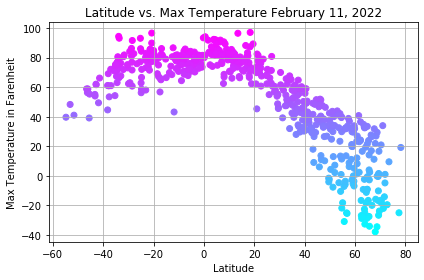

In [37]:
# Used information from:
# https://www.programiz.com/python-programming/datetime/current-datetime

# Scatter plot
plt.scatter(cleancitydata_df['Latitude'], cleancitydata_df['Max Temperature'], 
            c =cleancitydata_df['Max Temperature'], cmap= 'cool')

# Set textual properties
plt.title(f'Latitude vs. Max Temperature ' + time.strftime('%B %d, %Y'))
plt.ylabel('Max Temperature in Farenheit')
plt.xlabel('Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/latitude-temperature.png')

plt.show()

## Latitude vs. Humidity Plot

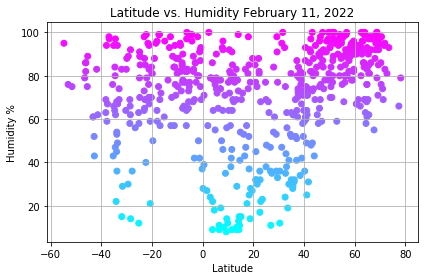

In [38]:
# Scatter plot
plt.scatter(cleancitydata_df['Latitude'], cleancitydata_df['Humidity'], 
            c =cleancitydata_df['Humidity'], cmap= 'cool')

# Set textual properties
plt.title(f'Latitude vs. Humidity ' + time.strftime('%B %d, %Y'))
plt.ylabel('Humidity %')
plt.xlabel('Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/latitude-humidity.png')

plt.show()

## Latitude vs. Cloudiness Plot

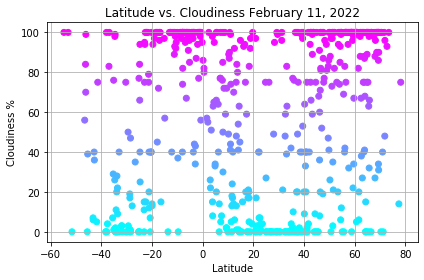

In [39]:
# Scatter plot
plt.scatter(cleancitydata_df['Latitude'], cleancitydata_df['Cloudiness'], 
            c =cleancitydata_df['Cloudiness'], cmap= 'cool')

# Set textual properties
plt.title(f'Latitude vs. Cloudiness ' + time.strftime('%B %d, %Y'))
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/latitude-cloudiness.png')

plt.show()

## Latitude vs. Wind Speed Plot

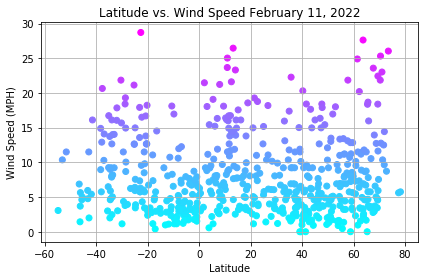

In [40]:
# Scatter plot
plt.scatter(cleancitydata_df['Latitude'], cleancitydata_df['Wind Speed'], 
            c =cleancitydata_df['Wind Speed'], cmap= 'cool')

# Set textual properties
plt.title(f'Latitude vs. Wind Speed ' + time.strftime('%B %d, %Y'))
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/latitude-windspeed.png')

plt.show()

## Linear Regression

In [112]:
# Split data into Northern and Southern Hemispheres
northernhemisphere = cleancitydata_df.loc[cleancitydata_df['Latitude'] > 0]
southernhemisphere = cleancitydata_df.loc[cleancitydata_df['Latitude'] < 0]

In [126]:
# Funciton for linear regression using specific hemisphere latitude vs y axis
def linearregression(xaxis, yaxis):
    # Perform a linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
                                                                  
    # Get regression values
    regress_values = xaxis * slope + intercept
                                                                  
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Regression plot must be inside function to call regress_values
    plt.plot(xaxis, regress_values, "r-")
    
    # Print r value
    print(f"The r-value is: {rvalue**2}")
    
    # Finish function and return line_eq to be used for plotting placement
    return line_eq

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7904259964305299


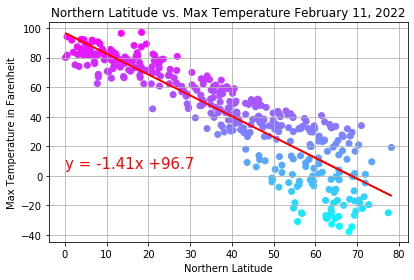

In [139]:
# Define x and y axis
xaxis = northernhemisphere['Latitude']
yaxis = northernhemisphere['Max Temperature']

# Scatter plot
plt.scatter(xaxis, yaxis, c = yaxis, cmap = 'cool')

# Linear regression
equation = linearregression(xaxis, yaxis)

# Print line equation
plt.annotate(equation,(0,5),fontsize=15,color="red")

# Set textual properties
plt.title(f'Northern Latitude vs. Max Temperature ' + time.strftime('%B %d, %Y'))
plt.ylabel('Max Temperature in Farenheit')
plt.xlabel('Northern Latitude')


# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/northhemisphere-temperaturelatitude.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.24218885878121385


<function matplotlib.pyplot.show(*args, **kw)>

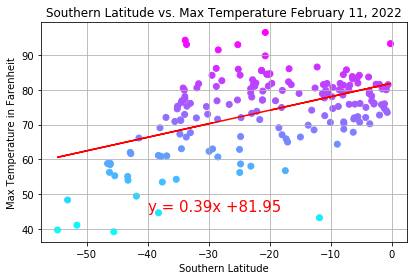

In [142]:
# Define x and y axis
xaxis = southernhemisphere['Latitude']
yaxis = southernhemisphere['Max Temperature']

# Scatter plot
plt.scatter(xaxis, yaxis, c = yaxis, cmap = 'cool')

# Linear regression
equation = linearregression(xaxis, yaxis)

# Print line equation
plt.annotate(equation,(-40,45),fontsize=15,color="red")

# Set textual properties
plt.title(f'Southern Latitude vs. Max Temperature ' + time.strftime('%B %d, %Y'))
plt.ylabel('Max Temperature in Farenheit')
plt.xlabel('Southern Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/southhemisphere-temperaturelatitude.png')

plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2788938893068842


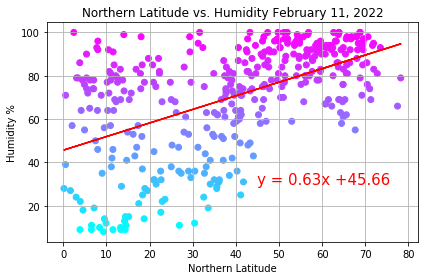

In [144]:
# Define x and y axis
xaxis = northernhemisphere['Latitude']
yaxis = northernhemisphere['Humidity']

# Scatter plot
plt.scatter(xaxis, yaxis, c = yaxis, cmap = 'cool')

# Linear regression
equation = linearregression(xaxis, yaxis)

# Print line equation
plt.annotate(equation,(45,30),fontsize=15,color="red")

# Set textual properties
plt.title(f'Northern Latitude vs. Humidity ' + time.strftime('%B %d, %Y'))
plt.ylabel('Humidity %')
plt.xlabel('Northern Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/northhemisphere-humiditylatitude.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04062219564529976


<function matplotlib.pyplot.show(*args, **kw)>

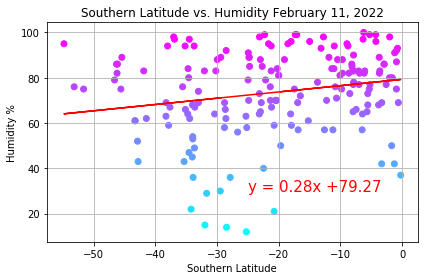

In [151]:
# Define x and y axis
xaxis = southernhemisphere['Latitude']
yaxis = southernhemisphere['Humidity']

# Scatter plot
plt.scatter(xaxis, yaxis, c = yaxis, cmap = 'cool')

# Linear regression
equation = linearregression(xaxis, yaxis)

# Print line equation
plt.annotate(equation,(-25,30),fontsize=15,color="red")

# Set textual properties
plt.title(f'Southern Latitude vs. Humidity ' + time.strftime('%B %d, %Y'))
plt.ylabel('Humidity %')
plt.xlabel('Southern Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/southhemisphere-humiditylatitude.png')

plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0856956283938891


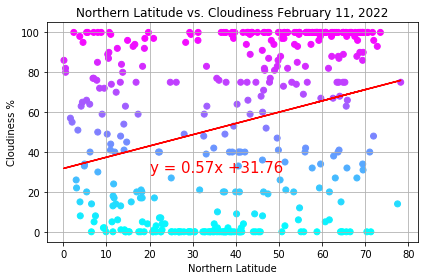

In [146]:
# Define x and y axis
xaxis = northernhemisphere['Latitude']
yaxis = northernhemisphere['Cloudiness']

# Scatter plot
plt.scatter(xaxis, yaxis, c = yaxis, cmap = 'cool')

# Linear regression
equation = linearregression(xaxis, yaxis)

# Print line equation
plt.annotate(equation,(20,30),fontsize=15,color="red")

# Set textual properties
plt.title(f'Northern Latitude vs. Cloudiness ' + time.strftime('%B %d, %Y'))
plt.ylabel('Cloudiness %')
plt.xlabel('Northern Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/northhemisphere-cloudinesslatitude.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.28574123866927914


<function matplotlib.pyplot.show(*args, **kw)>

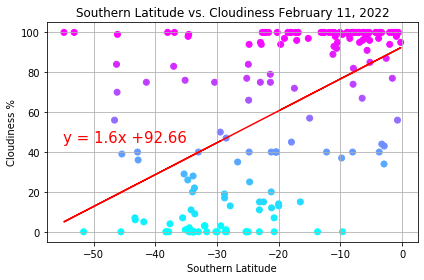

In [156]:
# Define x and y axis
xaxis = southernhemisphere['Latitude']
yaxis = southernhemisphere['Cloudiness']

# Scatter plot
plt.scatter(xaxis, yaxis, c = yaxis, cmap = 'cool')

# Linear regression
equation = linearregression(xaxis, yaxis)

# Print line equation
plt.annotate(equation,(-55,45),fontsize=15,color="red")

# Set textual properties
plt.title(f'Southern Latitude vs. Cloudiness ' + time.strftime('%B %d, %Y'))
plt.ylabel('Cloudiness %')
plt.xlabel('Southern Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/southhemisphere-cloudinesslatitude.png')

plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.004522880719697617


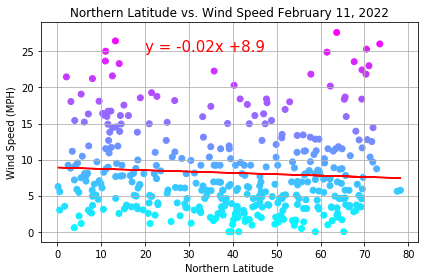

In [147]:
# Define x and y axis
xaxis = northernhemisphere['Latitude']
yaxis = northernhemisphere['Wind Speed']

# Scatter plot
plt.scatter(xaxis, yaxis, c = yaxis, cmap = 'cool')

# Linear regression
equation = linearregression(xaxis, yaxis)

# Print line equation
plt.annotate(equation,(20,25),fontsize=15,color="red")

# Set textual properties
plt.title(f'Northern Latitude vs. Wind Speed ' + time.strftime('%B %d, %Y'))
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Northern Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/northhemisphere-windspeedlatitude.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression